In [57]:
from bs4 import BeautifulSoup     # For HTML parsing
import urllib                     # Website connections
import re                         # Regular expressions
from time import sleep            # To prevent overwhelming the server between connections
from collections import Counter   # Keep track of our term counts
from nltk.corpus import stopwords # Filter out stopwords, such as 'the', 'or', 'and'
import pandas as pd               # For converting results to a dataframe and bar chart plots
import matplotlib.pyplot as plt
%matplotlib inline

from lxml import html
import requests

In [2]:
link = 'https://play.google.com/store/apps/category/GAME/collection/topselling_free?hl=en'

In [3]:
html = urllib.request.urlopen(urllib.request.Request(link)).read()

In [4]:
page_soup = BeautifulSoup(html, 'html5lib')

In [5]:
print(page_soup)

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://ogp.me/ns#"><head><script>(function(){window.latencyTrackerTimes={clientSideStartMs:Date.now()};}).call(this);</script><script>(function(){function _DumpException(b){window.console.error(b.stack)};var e=this,m=Date.now||function(){return+new Date};var u={};function aa(b,c){if(null===c)return!1;if("contains"in b&&1==c.nodeType)return b.contains(c);if("compareDocumentPosition"in b)return b==c||!!(b.compareDocumentPosition(c)&16);for(;c&&b!=c;)c=c.parentNode;return c==b};function ba(b,c){return function(a){a||(a=window.event);return c.call(b,a)}}function w(b){b=b.target||b.srcElement;!b.getAttribute&&b.parentNode&&(b=b.parentNode);return b}var z="undefined"!=typeof navigator&&/Macintosh/.test(navigator.userAgent),ca="undefined"!=typeof navigator&&!/Opera/.test(navigator.userAgent)&&/WebKit/.test(navigator.userAgent),da={A:1,INPUT:1,TEXTAREA:1,SELECT:1,BUTTON:1};function ea(){this._mouseEventsPrevented=!0

In [6]:
html = urllib.request.urlopen(link).read()

In [7]:
page_soup = BeautifulSoup(html, 'html5lib')

In [8]:
print(page_soup)

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://ogp.me/ns#"><head><script>(function(){window.latencyTrackerTimes={clientSideStartMs:Date.now()};}).call(this);</script><script>(function(){function _DumpException(b){window.console.error(b.stack)};var e=this,m=Date.now||function(){return+new Date};var u={};function aa(b,c){if(null===c)return!1;if("contains"in b&&1==c.nodeType)return b.contains(c);if("compareDocumentPosition"in b)return b==c||!!(b.compareDocumentPosition(c)&16);for(;c&&b!=c;)c=c.parentNode;return c==b};function ba(b,c){return function(a){a||(a=window.event);return c.call(b,a)}}function w(b){b=b.target||b.srcElement;!b.getAttribute&&b.parentNode&&(b=b.parentNode);return b}var z="undefined"!=typeof navigator&&/Macintosh/.test(navigator.userAgent),ca="undefined"!=typeof navigator&&!/Opera/.test(navigator.userAgent)&&/WebKit/.test(navigator.userAgent),da={A:1,INPUT:1,TEXTAREA:1,SELECT:1,BUTTON:1};function ea(){this._mouseEventsPrevented=!0

In [9]:
games = page_soup.findAll("div", {"class", "id-card-list card-list two-cards"})

In [10]:
game = page_soup.findAll("div", {"class", "card-content id-track-click id-track-impression"})

In [11]:
games_link = []

In [12]:
def parse_html(soup):
    
    try:
        game = soup.findAll("div", {"class", "id-app-title"})[0].text
        print (game)
    except:
        game = 'Unknown'
    
    try:
        developer = soup.findAll("a", {"class", "document-subtitle primary"})[0].text
        print(developer)
    except:
        developer = 'Unknown'
    
    try:
        genre = soup.findAll("a", {"class", "document-subtitle category"})[0].text
        print(genre)
    except:
        genre = 'Unknown'

    try:
        a = soup.findAll("div", {"class", "document-subtitle content-rating-title"})
        b = re.findall('>.*<', str(a))[0]
        content_rating = b.replace('>','').replace('<','')
        print(content_rating)
    except:
        content_rating = 'Unknown'
    
    try:
        count_rev = soup.findAll("div", {"class", "reviews-stats"})
        count_rev = re.findall('\d+,\d+', str(count_rev))[0]
        print(count_rev)
    except:
        count_rev = 'Unknown'
        
    try:
        avg_rating = soup.findAll("div", {"class", "score"})
        avg_rating = re.findall('\d+.\d+', str(avg_rating))[0]
        print(avg_rating)
    except:
        avg_rating = 'Unknown'
        
    try:
        installs = soup.findAll("div", {"class", "content"})[1].text
        print(installs)
    except:
        installs = 'Unknown'
        
    try:
        last_update = soup.findAll("div", {"class", "content"})[0].text
        print(last_update)
    except:
        last_update = 'Unknown'
    
    return game, developer, genre, content_rating, count_rev, avg_rating, installs, last_update

In [13]:
for ele in game:
    game_pre_link = ele.find('a').get('href')
    game_link= 'https://play.google.com' + str(game_pre_link)
    print(game_link)
    games_link.append(game_link)

https://play.google.com/store/apps/details?id=io.voodoo.goplane1
https://play.google.com/store/apps/details?id=io.voodoo.dune
https://play.google.com/store/apps/details?id=com.bitmango.go.wordcookiescross
https://play.google.com/store/apps/details?id=com.netease.ko
https://play.google.com/store/apps/details?id=com.h8games.fireballcave
https://play.google.com/store/apps/details?id=com.ngame.allstar.eu
https://play.google.com/store/apps/details?id=io.voodoo.stackjump
https://play.google.com/store/apps/details?id=com.nintendo.zara
https://play.google.com/store/apps/details?id=com.bdj.vortexDroid
https://play.google.com/store/apps/details?id=com.easybrain.sudoku.android
https://play.google.com/store/apps/details?id=com.netease.chiji
https://play.google.com/store/apps/details?id=com.roblox.client
https://play.google.com/store/apps/details?id=com.bentostudio.ballsvsblocks
https://play.google.com/store/apps/details?id=com.kiloo.subwaysurf
https://play.google.com/store/apps/details?id=com.youm

In [14]:
games_link

['https://play.google.com/store/apps/details?id=io.voodoo.goplane1',
 'https://play.google.com/store/apps/details?id=io.voodoo.dune',
 'https://play.google.com/store/apps/details?id=com.bitmango.go.wordcookiescross',
 'https://play.google.com/store/apps/details?id=com.netease.ko',
 'https://play.google.com/store/apps/details?id=com.h8games.fireballcave',
 'https://play.google.com/store/apps/details?id=com.ngame.allstar.eu',
 'https://play.google.com/store/apps/details?id=io.voodoo.stackjump',
 'https://play.google.com/store/apps/details?id=com.nintendo.zara',
 'https://play.google.com/store/apps/details?id=com.bdj.vortexDroid',
 'https://play.google.com/store/apps/details?id=com.easybrain.sudoku.android',
 'https://play.google.com/store/apps/details?id=com.netease.chiji',
 'https://play.google.com/store/apps/details?id=com.roblox.client',
 'https://play.google.com/store/apps/details?id=com.bentostudio.ballsvsblocks',
 'https://play.google.com/store/apps/details?id=com.kiloo.subwaysurf'

In [15]:
def get_html(url):
    html = urllib.request.urlopen(urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})).read()
    soup = BeautifulSoup(html, 'html5lib')
    sleep(6)
    return pd.Series(soup).apply(parse_html)


In [16]:
get_html(games_link[3])

Knives Out
 NetEase Games 
 Adventure 
52,309
4.3
 1,000,000 - 5,000,000 
15 December 2017


0    (Unknown, Unknown, Unknown, Unknown, Unknown, ...
1    (Knives Out,  NetEase Games ,  Adventure , Unk...
dtype: object

In [23]:
list_game_info = pd.Series(games_link).apply(get_html)

Go Plane
 VOODOO 
 Arcade 
4.2
 100,000 - 500,000 
19 December 2017
Dune!
 VOODOO 
 Arcade 
95,436
3.9
 10,000,000 - 50,000,000 
12 December 2017
WordCookies Cross
 BitMango 
 Word 
7,755
4.6
 100,000 - 500,000 
20 December 2017
Knives Out
 NetEase Games 
 Adventure 
52,309
4.3
 1,000,000 - 5,000,000 
15 December 2017
Fire Rides
 VOODOO 
 Action 
3,346
2.6
 500,000 - 1,000,000 
15 December 2017
Arena of Valor: 5v5 Arena Game
 Tencent Games 
 Action 
171,478
4.4
 1,000,000 - 5,000,000 
6 December 2017
Stack Jump
 VOODOO 
 Arcade 
35,080
4.3
 5,000,000 - 10,000,000 
21 November 2017
Super Mario Run
 Nintendo Co., Ltd. 
 Action 
1,054
3.7
 50,000,000 - 100,000,000 
17 November 2017
Rolly Vortex
 VOODOO 
 Arcade 
2,577
4.1
 500,000 - 1,000,000 
21 December 2017
Sudoku - Classic Logic Puzzle Game
 Easybrain Ltd 
 Board 
34,183
4.6
 1,000,000 - 5,000,000 
5 December 2017
RULES OF SURVIVAL
 NetEase Games 
 Action 
212,152
4.2
 10,000,000 - 50,000,000 
21 December 2017
ROBLOX
 ROBLOX Corporati

In [18]:
column_name = ['title', 'publisher', 'genre', 'content_rating', 'no_rev', 'ave_rating', 'installs', 'last_update']

In [19]:
pd.DataFrame(pd.DataFrame(list_game_info)[1].tolist(), columns = column_name)

,title,publisher,genre,content_rating,no_rev,ave_rating,installs,last_update
0,Go Plane,VOODOO,Arcade,Unknown,Unknown,4.2,"100,000 - 500,000",19 December 2017
1,Dune!,VOODOO,Arcade,Unknown,"95,436",3.9,"10,000,000 - 50,000,000",12 December 2017
2,WordCookies Cross,BitMango,Word,Unknown,"7,755",4.6,"100,000 - 500,000",20 December 2017
3,Knives Out,NetEase Games,Adventure,Unknown,"52,309",4.3,"1,000,000 - 5,000,000",15 December 2017
4,Fire Rides,VOODOO,Action,Unknown,"3,346",2.6,"500,000 - 1,000,000",15 December 2017
5,Arena of Valor: 5v5 Arena Game,Tencent Games,Action,Unknown,"171,478",4.4,"1,000,000 - 5,000,000",6 December 2017
6,Stack Jump,VOODOO,Arcade,Unknown,"35,080",4.3,"5,000,000 - 10,000,000",21 November 2017
7,Super Mario Run,"Nintendo Co., Ltd.",Action,Unknown,"1,054",3.7,"50,000,000 - 100,000,000",17 November 2017
8,Rolly Vortex,VOODOO,Arcade,Unknown,"2,577",4.1,"500,000 - 1,000,000",21 December 2017
9,Sudoku - Classic Logic Puzzle Game,Easybrain Ltd,Board,Unknown,"34,183",4.6,"1,000,000 - 5,000,000",5 December 2017


### Data Visualisation

Initially, I wanted to scrape 300 games, but the data didn't scrape consistently every time. Sometimes I scraped 19 games, but the maximum number of games I was able to scrape was 60, which I saved into a csv file.

In [5]:
df = pd.read_csv('GooglePlayTop60.csv', sep=',', encoding='latin1')

In [6]:
df

,game,devloper,genre,content_rating,count_rev,avg_rating,installs,last_update
0,Go Plane,VOODOO,Arcade,Unknown,Unknown,4.2,"50,000 - 100,000",19-Dec-17
1,Dune!,VOODOO,Arcade,Unknown,"95,320",3.9,"10,000,000 - 50,000,000",12-Dec-17
2,WordCookies Cross,BitMango,Word,Unknown,"7,547",4.6,"100,000 - 500,000",20-Dec-17
3,Knives Out,NetEase Games,Adventure,Unknown,"51,326",4.2,"1,000,000 - 5,000,000",15-Dec-17
4,Arena of Valor: 5v5 Arena Game,Tencent Games,Action,Unknown,"171,201",4.4,"1,000,000 - 5,000,000",06-Dec-17
5,Fire Rides,VOODOO,Action,Unknown,"3,275",2.6,"500,000 - 1,000,000",15-Dec-17
6,Stack Jump,VOODOO,Arcade,Unknown,"35,033",4.3,"5,000,000 - 10,000,000",21-Nov-17
7,Super Mario Run,"Nintendo Co., Ltd.",Action,Unknown,"1,054",3.7,"50,000,000 - 100,000,000",17-Nov-17
8,Sudoku - Classic Logic Puzzle Game,Easybrain Ltd,Board,Unknown,"33,885",4.6,"1,000,000 - 5,000,000",05-Dec-17
9,Rolly Vortex,VOODOO,Arcade,Unknown,"2,365",4.1,"500,000 - 1,000,000",21-Dec-17


In [7]:
import matplotlib
import matplotlib.pyplot as plt

<b> Genre Count

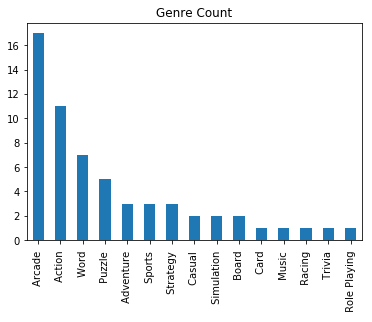

In [8]:
genre_count = df['genre'].value_counts()
genre_count.plot(x = 'column_name', kind = 'bar', legend = None, title = 'Genre Count')

In [9]:
df['count_rev'] = df['count_rev'].replace('Unknown','').str.replace(',','')
df['count_rev'] = pd.to_numeric(df['count_rev'])

In [10]:
df['weighted_rating'] = df['avg_rating']/df['count_rev']

In [11]:
df.head()

,game,devloper,genre,content_rating,count_rev,avg_rating,installs,last_update,weighted_rating
0,Go Plane,VOODOO,Arcade,Unknown,NaN,4.2,"50,000 - 100,000",19-Dec-17,NaN
1,Dune!,VOODOO,Arcade,Unknown,95320.0,3.9,"10,000,000 - 50,000,000",12-Dec-17,0.000041
2,WordCookies Cross,BitMango,Word,Unknown,7547.0,4.6,"100,000 - 500,000",20-Dec-17,0.000610
3,Knives Out,NetEase Games,Adventure,Unknown,51326.0,4.2,"1,000,000 - 5,000,000",15-Dec-17,0.000082
4,Arena of Valor: 5v5 Arena Game,Tencent Games,Action,Unknown,171201.0,4.4,"1,000,000 - 5,000,000",06-Dec-17,0.000026


<b> Top 5 Developers

Text(0,0.5,'Counts')

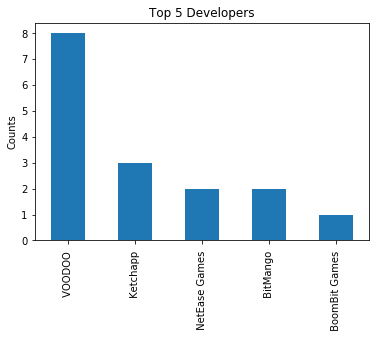

In [67]:
dev_counts = df['devloper'].value_counts()
dev_counts.head().plot(x = dev_counts[0:5], kind = 'bar', legend = None, title = 'Top 5 Developers')
plt.ylabel('Counts')

In [14]:
from datetime import datetime
from dateutil.parser import parse
datetime.strptime(df['last_update'][0], '%d-%b-%y')

datetime.datetime(2017, 12, 19, 0, 0)

In [15]:
#Changed last update column to date values
x = pd.to_datetime(df['last_update'], format = '%d-%b-%y')
df['last_update'] = x

In [16]:
df.head()

,game,devloper,genre,content_rating,count_rev,avg_rating,installs,last_update,weighted_rating
0,Go Plane,VOODOO,Arcade,Unknown,NaN,4.2,"50,000 - 100,000",2017-12-19,NaN
1,Dune!,VOODOO,Arcade,Unknown,95320.0,3.9,"10,000,000 - 50,000,000",2017-12-12,0.000041
2,WordCookies Cross,BitMango,Word,Unknown,7547.0,4.6,"100,000 - 500,000",2017-12-20,0.000610
3,Knives Out,NetEase Games,Adventure,Unknown,51326.0,4.2,"1,000,000 - 5,000,000",2017-12-15,0.000082
4,Arena of Valor: 5v5 Arena Game,Tencent Games,Action,Unknown,171201.0,4.4,"1,000,000 - 5,000,000",2017-12-06,0.000026


<b> Last Update x Average Rating

Text(0.5,0,'Date of Last Update')

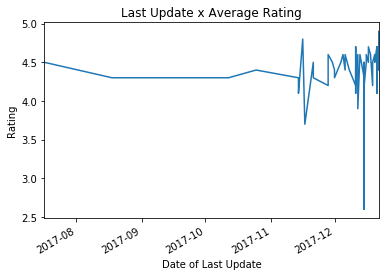

In [60]:
# Are there any patterns with recency of update and average rating?
dt_avg_rating = df[['last_update', 'avg_rating']].set_index('last_update')
dt_avg_rating.plot(legend = None, title = 'Last Update x Average Rating')
plt.ylabel('Rating')
plt.xlabel('Date of Last Update')

The more recent the update, the more variale the rating is - perhaps due to having less ratings overall to go off of?

<b> Changing the installs(str) to Category Values

In [18]:
# Viet the current unique bins
list(df['installs'].unique())

[' 50,000 - 100,000 ',
 ' 10,000,000 - 50,000,000 ',
 ' 100,000 - 500,000 ',
 ' 1,000,000 - 5,000,000 ',
 ' 500,000 - 1,000,000 ',
 ' 5,000,000 - 10,000,000 ',
 ' 50,000,000 - 100,000,000 ',
 ' 500,000,000 - 1,000,000,000 ',
 ' 100,000,000 - 500,000,000 ',
 ' 10,000 - 50,000 ',
 '  Varies with device ']

In [27]:
# Define a function to relabel the bins
install_code = []
def install_cats(x):
    if x == ' 10,000 - 50,000 ':
        install_code = 1
    elif x == ' 50,000 - 100,000 ':
        install_code = 2
    elif x == ' 100,000 - 500,000 ':
        install_code = 3
    elif x == ' 500,000 - 1,000,000 ':
        install_code = 4
    elif x == ' 1,000,000 - 5,000,000 ':
        install_code = 5
    elif x == ' 5,000,000 - 10,000,000 ':
        install_code = 6
    elif x == ' 10,000,000 - 50,000,000 ':
        install_code = 7
    elif x == ' 50,000,000 - 100,000,000 ':
        install_code = 8
    elif x == ' 100,000,000 - 500,000,000 ':
        install_code = 9
    elif x == ' 500,000,000 - 1,000,000,000 ':
        install_code = 10
    else: 
        install_code = 0
        
    return install_code



In [29]:
# Reassign labels to the df
df['installs_bins'] = df['installs'].apply(install_cats)

In [30]:
df.head()

,game,devloper,genre,content_rating,count_rev,avg_rating,installs,last_update,weighted_rating,installs_bins
0,Go Plane,VOODOO,Arcade,Unknown,NaN,4.2,"50,000 - 100,000",2017-12-19,NaN,2
1,Dune!,VOODOO,Arcade,Unknown,95320.0,3.9,"10,000,000 - 50,000,000",2017-12-12,0.000041,7
2,WordCookies Cross,BitMango,Word,Unknown,7547.0,4.6,"100,000 - 500,000",2017-12-20,0.000610,3
3,Knives Out,NetEase Games,Adventure,Unknown,51326.0,4.2,"1,000,000 - 5,000,000",2017-12-15,0.000082,5
4,Arena of Valor: 5v5 Arena Game,Tencent Games,Action,Unknown,171201.0,4.4,"1,000,000 - 5,000,000",2017-12-06,0.000026,5


In [66]:
# Sort df by weighted rating for games with ratings higher than 4.5
df[df['avg_rating'] > 4.5].sort_values('weighted_rating', ascending=False)

,game,devloper,genre,content_rating,count_rev,avg_rating,installs,last_update,weighted_rating,installs_bins
57,Homescapes,Playrix Games,Casual,Unknown,1626.0,4.6,"10,000,000 - 50,000,000",2017-12-06,0.002829,7
32,Word Cookiesã¢,BitMango,Word,Unknown,1978.0,4.6,"10,000,000 - 50,000,000",2017-12-18,0.002326,7
58,Hill Climb Racing 2,Fingersoft,Racing,Unknown,2228.0,4.6,"50,000,000 - 100,000,000",2017-12-22,0.002065,8
36,Chilly Snow,Acid Cousins,Arcade,Unknown,5613.0,4.6,"100,000 - 500,000",2017-12-21,0.000820,3
47,Sniper 3D Gun Shooter: Free Shooting Games - FPS,Fun Games For Free,Action,Unknown,5851.0,4.6,Varies with device,2017-12-22,0.000786,0
29,Piano Tiles 2ã¢(Don't Tap...2),Cheetah Games,Arcade,Unknown,7626.0,4.7,"100,000,000 - 500,000,000",2017-12-17,0.000616,9
2,WordCookies Cross,BitMango,Word,Unknown,7547.0,4.6,"100,000 - 500,000",2017-12-20,0.000610,3
54,Clash Royale,Supercell,Strategy,Unknown,19915.0,4.6,"100,000,000 - 500,000,000",2017-12-13,0.000231,9
17,Rush,Ketchapp,Arcade,Unknown,29961.0,4.6,"1,000,000 - 5,000,000",2017-11-28,0.000154,5
8,Sudoku - Classic Logic Puzzle Game,Easybrain Ltd,Board,Unknown,33885.0,4.6,"1,000,000 - 5,000,000",2017-12-05,0.000136,5


<b> Number of Installs and Weighted Ratings

Text(0.5,0,'Install Bins')

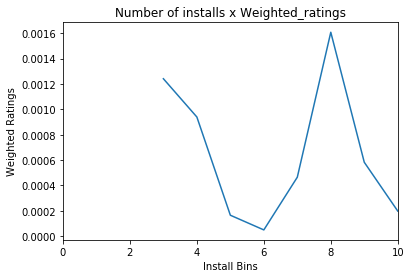

In [81]:
installs_ratings = df.groupby('installs_bins')['weighted_rating'].mean()
installs_ratings.plot(legend = None, title = 'Number of installs x Weighted_ratings')
plt.ylabel('Weighted Ratings')
plt.xlabel('Install Bins')